# Exercise: Fitting IR spectra

Prerequisites:

* types
* functions
* containers
* numpy 
* optimisation
* io

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit, minimize

This is one of the *long-form* exercises in the book. 
The idea behind these are to introduce a particular problem, and then allow the space to work on it. 

In this exercise, your will get an introdcution into using Python to fit experimental data, using a process called model-dependent analysis. 
The specific application will be the anlaysis of an IR spectra from a mixture of organic species, however, hopefully you will recognise that the methods used herein are generalisable. 

## Aim 

You have been tasked with determining the relative composition of a mixture of two organic species; namely toluene and benyl alcohol. 
You have recognised, that using IR spectroscopy and some data analysis, it may be possible to evaluate this. 

## Reading in and plotting experimental data

IR spectra of the two species in isolation were available online, from the [NIST Chemistry Webbook](https://webbook.nist.gov/chemistry/).
These are available in the files `toluene.csv` and `benzyl_alcohol.csv`, these files consist of two columns the first is the wavenumber, $\bar{\nu}$, and the second is the transmittance ($T$). 
Referring to the previous section on [reading and writing data](./io.html), in the cell below, use [`np.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) to open these files and store the information in array objects. 



In [2]:
# Write your code here

Having read the isolated data in, referring to the [plotting introduction](./simple_plots.html) if necessary, plot both of the isolated IR spectra on a single plot. 

In [3]:
# Write your code here

With the isolated data read in and plotted, we now need the mixture data. 
This is stored in the file named `mixture.csv`, which in addition to the two columns that the other files have, has a third column containing information about the uncertainty in the transmittance ($\mathrm{d}T$). 
Read this file in, and plot the data (and the uncertainties).

In [4]:
# Write your code here

Having plotted each of the three datasets, you should be able to identify features present in the mixture data that match those in the isolated datasets. 
Such as the large feature in the toluene isolated data that can be seen in the mixture data at around 3000 cm<sup>-1</sup>, and then at higher energy there is a broad feature in the benzyl alcohol isolated data between 3250 cm<sup>-1</sup> and 3750 cm<sup>-1</sup>, that can also be found in the experimental data.

## Fitting

You will hopefully have encounter data fitting before, for example when a straight line of best fit is applied to some experimental data points. 
This is shown below, where the blue dots are some discrete datapoints and the orange line is the line of best fit. 
In order to determine this line of best fit, we have a metric that we want to minimise which represents the difference between the data and the model (the straight line). 

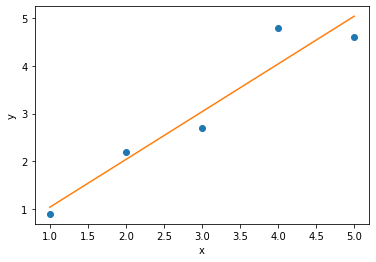

In [5]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.9, 2.2, 2.7, 4.8, 4.6])

plt.plot(x, y, 'o')
# This function performs a linear regression
# on the data x and y
res = linregress(x, y)
model = res.slope * x + res.intercept
plt.plot(x, model, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This minimisation can be achieved for a straight line model through linear regression, a mathematical operation which minimises the squared-residuals for each point. 
The residuals are the difference between the model (the straight line) and the data. 

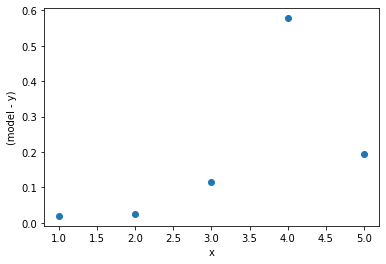

In [6]:
sq_resid = np.square(model - y)
plt.plot(x, sq_resid, 'o')
plt.xlabel('x')
plt.ylabel('(model - y)')
plt.show()

In order to describe this with a single value to minimise, we typically talk about minimising the **sum** of the square-residuals, which is sometimes referred to as $\chi^2$. 

In [7]:
print('chi^2 = {:0.3f}'.format(np.sum(sq_resid)))

chi^2 = 0.932


> The reason that a square is taken of the residuals, rather than just the absolute value is to put a greater emphasis on outlying datapoints, such as the 4th point in the example above. 

The closer the $\chi^2$ value is to 0, the better the agreement between the model and the data. 

Define a function, to calculate the $\chi^2$ between a IR spectra of an isolated compound and the mixture data, you won't be able to use it yet.

In [8]:
# Write your code here

## Interpolation

In the plots you have produced earlier, you might be able to notice that the values for wavenumber that are measured in each spectra are not the same. 
This can be seen clearly if we print the minimum and maximum values for each spectra. 
These can be accessed using the [`np.amin()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.amin.html#numpy.amin) and [`np.amax()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html#numpy.amax) functions.

In [9]:
# Write your code here

In order to determine the $\chi^2$-value between our model (outlined later) and the data (the mixture), it is necessary that the positions on the $x$-axis for the two are the same. 
Additionally, since our model will be created from mixing the toluene and benzyl alcohol spectra, we will need to normalised these $x$-axes. 
This technique of this is referred to as **interpolation**.

Interpolation is where we determine new data points within the range of a discrete set of known points. 
Essentially we use what we know about the $x$- and $y$-data and have an educated guess at the $y$-values for a different set of $x$-values. It is important that the new range of $x$ values is from within the existing range, or else we are [extrapolating](https://xkcd.com/605/), which can be very inaccurate. 
For the data in this exercise, the range of the mixture data lies within the other two datasets, therefore we will use the wavenumber values from the mixture and interpolate new values for the isolated materials. 

To interpolate new $y$-values, we will use the [`np.interp()` function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html). 
This function takes three arguments, the new $x$-axis, the old $x$-axis, and the old $y$-axis values, and it will return a new set of $y$-axis values.

In the cell below, interpolate new sets of $y$-values for the two isolated datasets, for the $x$-axis values from the mixture dataset. 
Then calculate the $\chi^2$-value for each pure isolated IR spectra with the mixture data. 

In [10]:
# Write your code here

Now, plot your interpolated data alongside the original data to ensure that the interpolation has been accurate. 

In [11]:
# Write your code here

## Fitting real data

In the example shown previously, we were not working with "real" data, as there was no uncertainty on the measurement. 
However, if we compare the slope of the straight line from the previous example to that where some uncertainty is present, there is a small, but important change. 

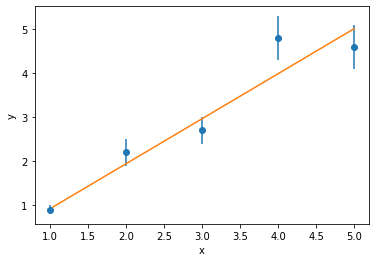

In [12]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.9, 2.2, 2.7, 4.8, 4.6])
dy = np.array([0.1, 0.3, 0.3, 0.5, 0.5])

def straight_line(x, m, c):
    return m * x + c

plt.errorbar(x, y, dy, marker='o', ls='')
# This function performs fits a straight
# line, including uncertainties
popt, pcov = curve_fit(straight_line, x, y, sigma=dy)
model = popt[0] * x + popt[1]
plt.plot(x, model, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
print('Without uncertainties the gradient is {:.3f}'.format(res.slope))
print('With uncertainties the gradient is {:.3f}'.format(popt[0]))

Without uncertainties the gradient is 1.000
With uncertainties the gradient is 1.026


In order to consider the uncertainty, there is a slight modification to the $\chi^2$-calculation, where the square residual is divided by the uncertainty,

$$ \chi^2 = \sum_{x=1}^{N}\bigg[\frac{y_{\mathrm{model}}(x) - y_{\mathrm{exp}}(x)}{\mathrm{d}y_{\mathrm{exp}}(x)}\bigg]^2, $$

where $y_{\mathrm{model}}(x)$ is the model value at $x$, $y_{\mathrm{exp}}(x)$ is the experimental value at $x$, $\mathrm{d}y_{\mathrm{exp}}(x)$ is the uncertainty at $x$, and $N$ is the number of points in the dataset. 
For example, in the data above, 
- There are 5 datapoints, so $N=5$,
- When $x=3$, $y_{\mathrm{exp}}(3) = 2.7$ and $\mathrm{d}y_{\mathrm{exp}}(3) = 0.3$,
- The model value when $x=3$ can be found from the straight line equation, so if the gradient is 1 and intercept is 0, then $y_{\mathrm{model}}(x) = 1\times3 + 0 = 3$.

In the cell below, define a new function to calculate the $\chi^2$ value for **real** data.

In [14]:
# Write your code here

## Our model

Now that all three datasets are on the same axis and we undestand how uncertainties should be included in a data fitting process, it is necessary to define our model. 
We know that the mixture data contains only toluene and benzyl alcohol, therefore, we can *simulate* the expected IR transmission of a mixture of these through a simple linear combination. 

$$ T_{\mathrm{mix}} = cT_{\mathrm{toluene}} + (1 - c) T_{\mathrm{benzyl alcohol}}, $$

where $c$ is the fractional composition of toluene, and hence $1-c$ is the fractional composition of benzyl alcohol. 

Write a function that evaluates the mixture equation above in the cell below, and test it by plotting the spectra that would result from a 10:90 mixture along with the measured mixture spectra. 

In [15]:
# Write your code here

A 10:90 mixture of the components doesn't do a very good job of modelling the observed mixture data, therefore we need to optimise this, by minimising the $\chi^2$-value. 
Using what you learned in the [Optimisation](./optimisation.html) section, in the cell below, use `scipy.optimize.minimize` to obtain the optimum value for $c$. 
In order to achieve this, you will have to re-write your $\chi^2$ function such that $c$ is an input argument. 

In [16]:
# Write your code here